# Deutsche Lufthansa A.G. (LHA.DE)

[yahoo finance](https://finance.yahoo.com/quote/LHA.DE?p=LHA.DE&.tsrc=fin-srch)

In [3]:
import yfinance as yf
# set the start date and end date
start_date = '2021-01-01'
end_date = '2021-12-31'
# set the ticker
ticker = 'LHA.DE'
data = yf.download(ticker, start_date, end_date)
# print 5 rows
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-08,7.040,7.136,6.788,6.975,6.975,14707251
2021-11-09,6.980,7.122,6.926,7.003,7.003,11292256
2021-11-10,7.000,7.120,6.985,7.007,7.007,8720565
2021-11-11,6.940,6.950,6.623,6.701,6.701,13694381
2021-11-12,6.655,6.745,6.541,6.550,6.550,9137525


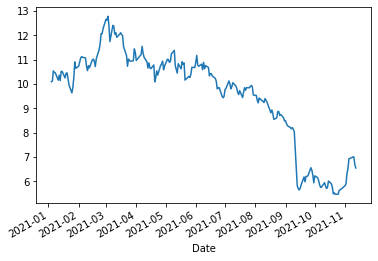

In [4]:
# import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
# plot adjusted close price data
data['Adj Close'].plot()
plt.show()

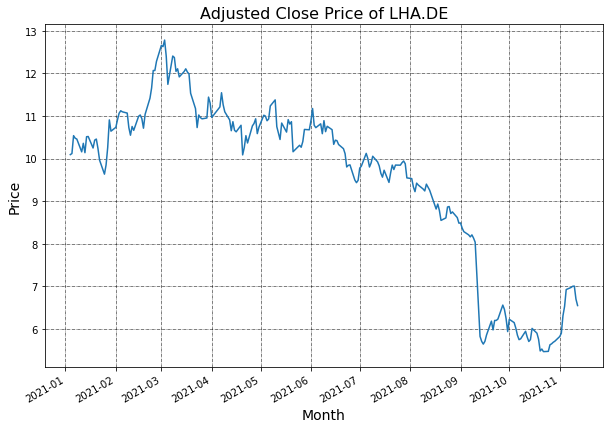

In [5]:
# plot the adjusted close price
data['Adj Close'].plot(figsize=(10,7))
# define the label for title of the figure
plt.title("Adjusted Close Price of %s" %ticker, fontsize=16)
# define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel("Month", fontsize=14)
# plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

In [6]:
lha = yf.Ticker("LHA.DE")
lha.info

{'zip': '50672',
 'sector': 'Industrials',
 'fullTimeEmployees': 106684,
 'longBusinessSummary': "Deutsche Lufthansa AG operates as an aviation company in Germany and internationally. The company's Network Airlines segment offers passenger services through a route network of 273 destinations in 86 countries. Its Eurowings segment provides passenger services through a route network of more than 210 destinations in 60 countries. The company's Logistics Business segment offers transport services for various cargoes, including living animals, valuable cargo, post and dangerous goods, and temperature-sensitive goods serving approximately 300 destinations in 100 countries. Its Maintenance, Repair and Overhaul Services (MRO) segment provides maintenance, repair, and overhaul services for civilian commercial aircraft serving original equipment manufacturers and aircraft leasing companies, operators of VIP jets, and airlines, as well as develops and manufactures cabin and digital products. The 

In [11]:
# get price to book
pb = lha.info['priceToBook']
pe = lha.info['regularMarketPrice']/lha.info['epsTrailingTwelveMonths']
print('Price to Book Ratio is: %.2f' % pb)
print('Price to Earnings Ratio is: %.2f' % pe)

KeyError: 'epsTrailingTwelveMonths'

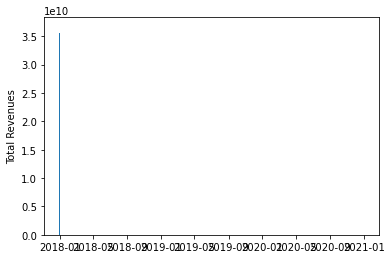

In [8]:
# show revenues
revenue = lha.financials.loc['Total Revenue']
plt.bar(revenue.index, revenue.values)
plt.ylabel("Total Revenues")
plt.show()

<AxesSubplot:xlabel='Date'>

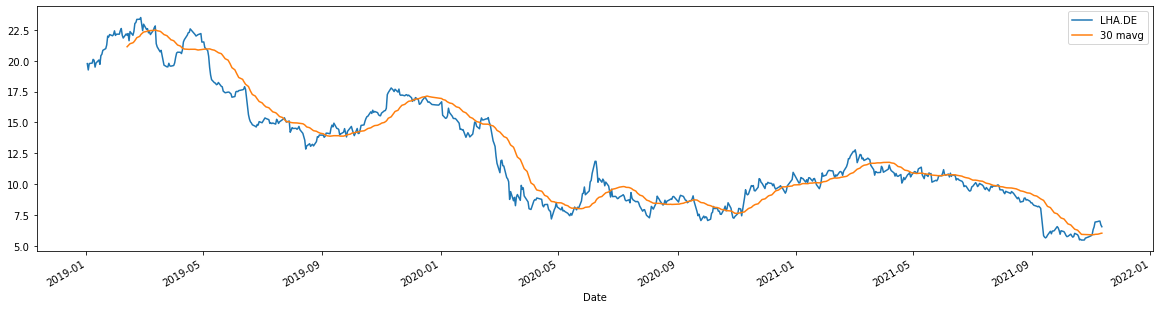

In [7]:
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

stocks = ['LHA.DE']
start = datetime.datetime(2019, 1, 1)
end = datetime.date.today()

def get_stock(stock,start,end):
     return pdr.DataReader(stock,'yahoo',start,end)['Close']
df = pd.DataFrame({n: get_stock(n, start, end) for n in stocks})
df['30 mavg'] = df.rolling(window=30).mean()
df.plot(figsize=(20, 5))